In [24]:
import numpy as np
import pandas as pd
from plotnine import *

|Variable Name|	Role|	Type	|Demographic	|Description|	Units	|Missing Values|
|----------|:---------|:---------|:---------|:---------|:---------|:---------|
|Gender|	Feature|	Categorical|	Gender|			| |no|
|Age|	Feature|	Continuous|	Age|	 |		|no|
|Height|	Feature|	Continuous|		 |		| |no|
|Weight|	Feature|	Continuous|		 |		| |no|
|family_history_with_overweight|	Feature|	Binary|	| 	Has a family member suffered or suffers from overweight?|		|no|
|FAVC|	Feature|	Binary|	  | Do you eat high caloric food frequently?|		|no|
|FCVC|	Feature|	Integer|	 | Do you usually eat vegetables in your meals?|		|no|
|NCP|	Feature|	Continuous|	 | How many main meals do you have daily?|		|no|
|CAEC|	Feature|	Categorical|  | Do you eat any food between meals?|		|no|
|SMOKE|	Feature|	Binary|	| Do you smoke?|		|no|
|CH2O|	Feature|	Continuous|		|How much water do you drink daily?|		|no|
|SCC|	Feature|	Binary|		|Do you monitor the calories you eat daily?|		|no|
|FAF|	Feature|	Continuous|		|How often do you have physical activity?|		|no|
|TUE|	Feature|	Integer|		|How much time do you use technological devices such as cell phone, videogames, television, computer and others?|		|no|
|CALC|	Feature|	Categorical|		|How often do you drink alcohol?|		|no|
|MTRANS|	Feature|	Categorical|		|Which transportation do you usually use?|		|no|
|NObeyesdad|	Target|	Categorical|		|Obesity level|		|no|

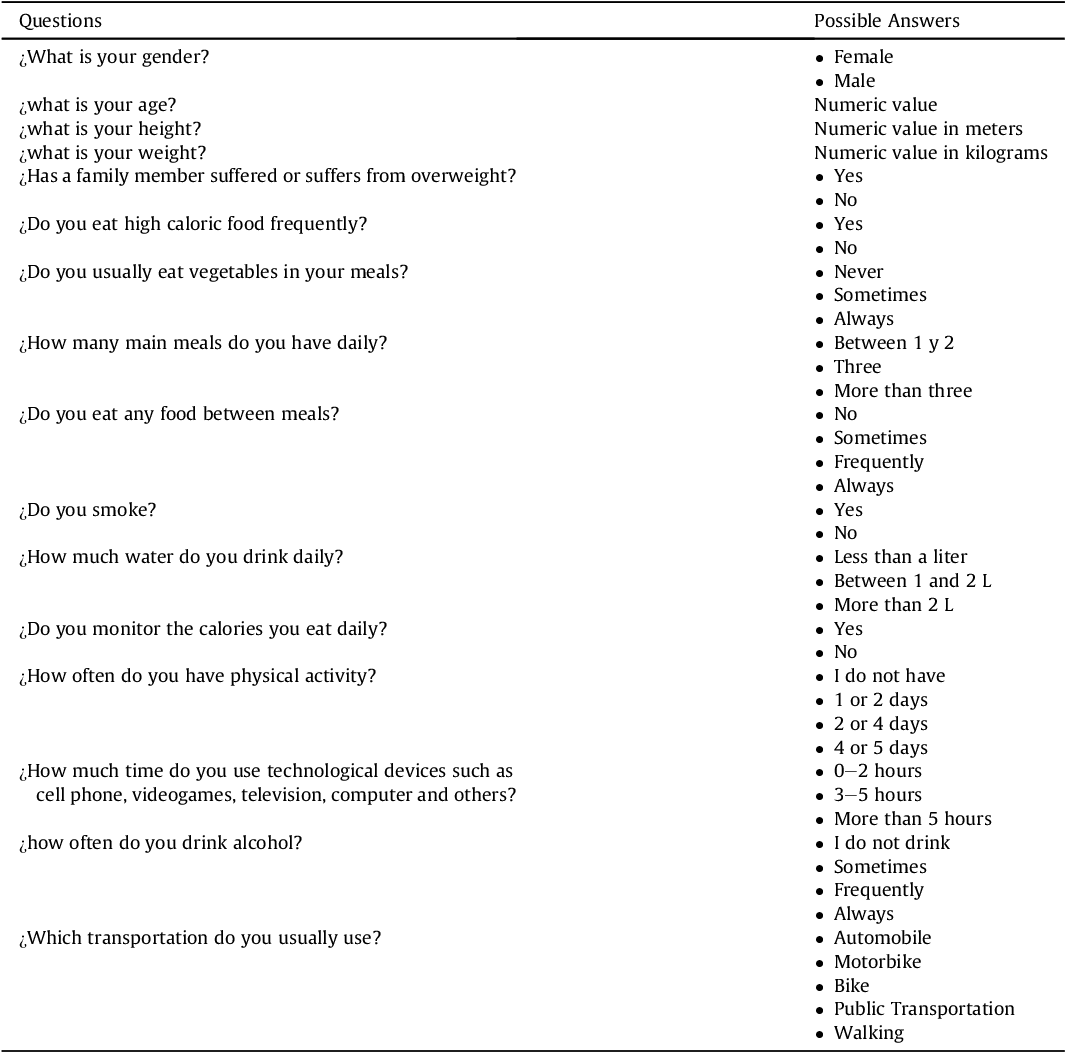

In [10]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [11]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [12]:
df['Age'].unique()

array([21.      , 23.      , 27.      , ..., 22.524036, 24.361936,
       23.664709])

In [13]:
df['NObeyesdad'].value_counts().reset_index()

,NObeyesdad,count
0,Obesity_Type_I,351
1,Obesity_Type_III,324
2,Obesity_Type_II,297
3,Overweight_Level_I,290
4,Overweight_Level_II,290
5,Normal_Weight,287
6,Insufficient_Weight,272


In [14]:
df.loc[df['Gender']=='Male']['NObeyesdad'].value_counts().reset_index()

,NObeyesdad,count
0,Obesity_Type_II,295
1,Obesity_Type_I,195
2,Overweight_Level_II,187
3,Normal_Weight,146
4,Overweight_Level_I,145
5,Insufficient_Weight,99
6,Obesity_Type_III,1


In [15]:
df['Age'].value_counts().reset_index()

,Age,count
0,18.000000,128
1,26.000000,101
2,21.000000,96
3,23.000000,89
4,19.000000,59
...,...,...
1397,23.320120,1
1398,34.243146,1
1399,18.549437,1
1400,36.310292,1


In [16]:
def crear_lista(paso):
    limite_inicial = 0
    limite_final = 70
    return list(zip(np.arange(limite_inicial, limite_final, paso), np.arange(limite_inicial + paso, limite_final + paso, paso)))

lista=crear_lista(10)

In [17]:
lista

[(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70)]

In [29]:
#La función next para buscar el primer intervalo que cumpla con la condición sin tener que escribir un bucle explícito
def encontrar_intervalo( elemento,lista_tuplas=lista_de_tuplas):
    resultado = next((tupla for tupla in lista_tuplas if elemento >= tupla[0] and elemento < tupla[1]), None)
    return f'{resultado[0]}-{resultado[1]}'

lista_de_tuplas = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70)]
numero_a_buscar = 13

resultado = encontrar_intervalo(numero_a_buscar)

In [30]:
df['Intervalos_de_edad']=df['Age'].apply(encontrar_intervalo)

In [31]:
df['Intervalos_de_edad'].unique()

array(['20-30', '40-50', '30-40', '50-60', '10-20', '60-70'], dtype=object)

In [32]:
df


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Intervalos_de_edad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,20-30
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,20-30
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,20-30
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,20-30
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,20-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,20-30
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,20-30
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,20-30
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,20-30


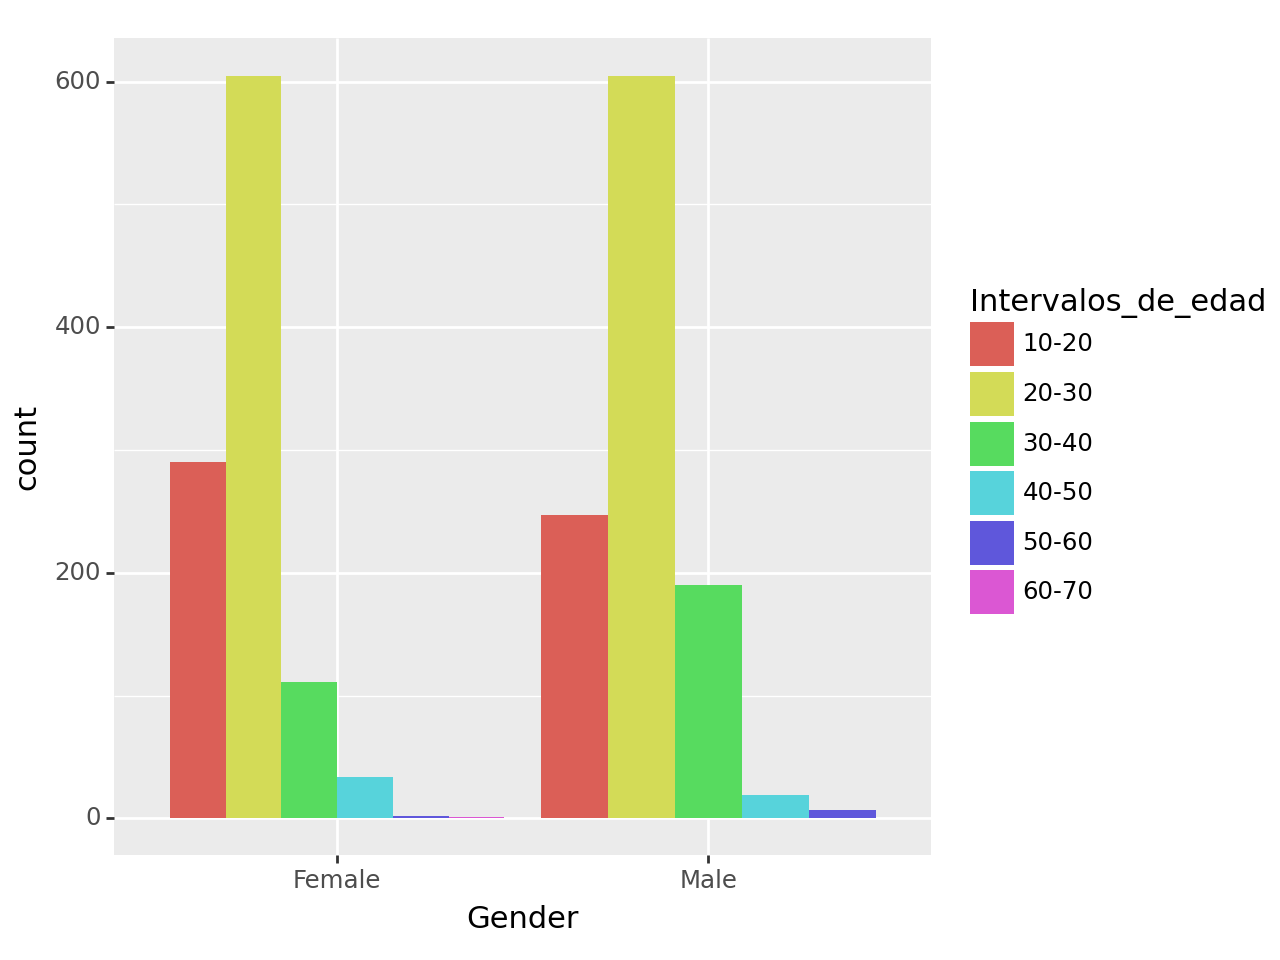

<Figure Size: (640 x 480)>

In [33]:
(ggplot(df, aes(x='Gender', fill='Intervalos_de_edad')) + 
    geom_bar(position='dodge'))

In [35]:
df=df.assign(imc=df['Weight']/(df['Height']*df['Height']))

In [36]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Intervalos_de_edad,imc
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,20-30,24.386526
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,20-30,24.238227
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,20-30,23.765432
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,20-30,26.851852
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,20-30,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,20-30,44.901475
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,20-30,43.741923
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,20-30,43.543817
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,20-30,44.071535


In [44]:
grouped=df.groupby('NObeyesdad').mean('imc').reset_index()[['NObeyesdad','imc']]

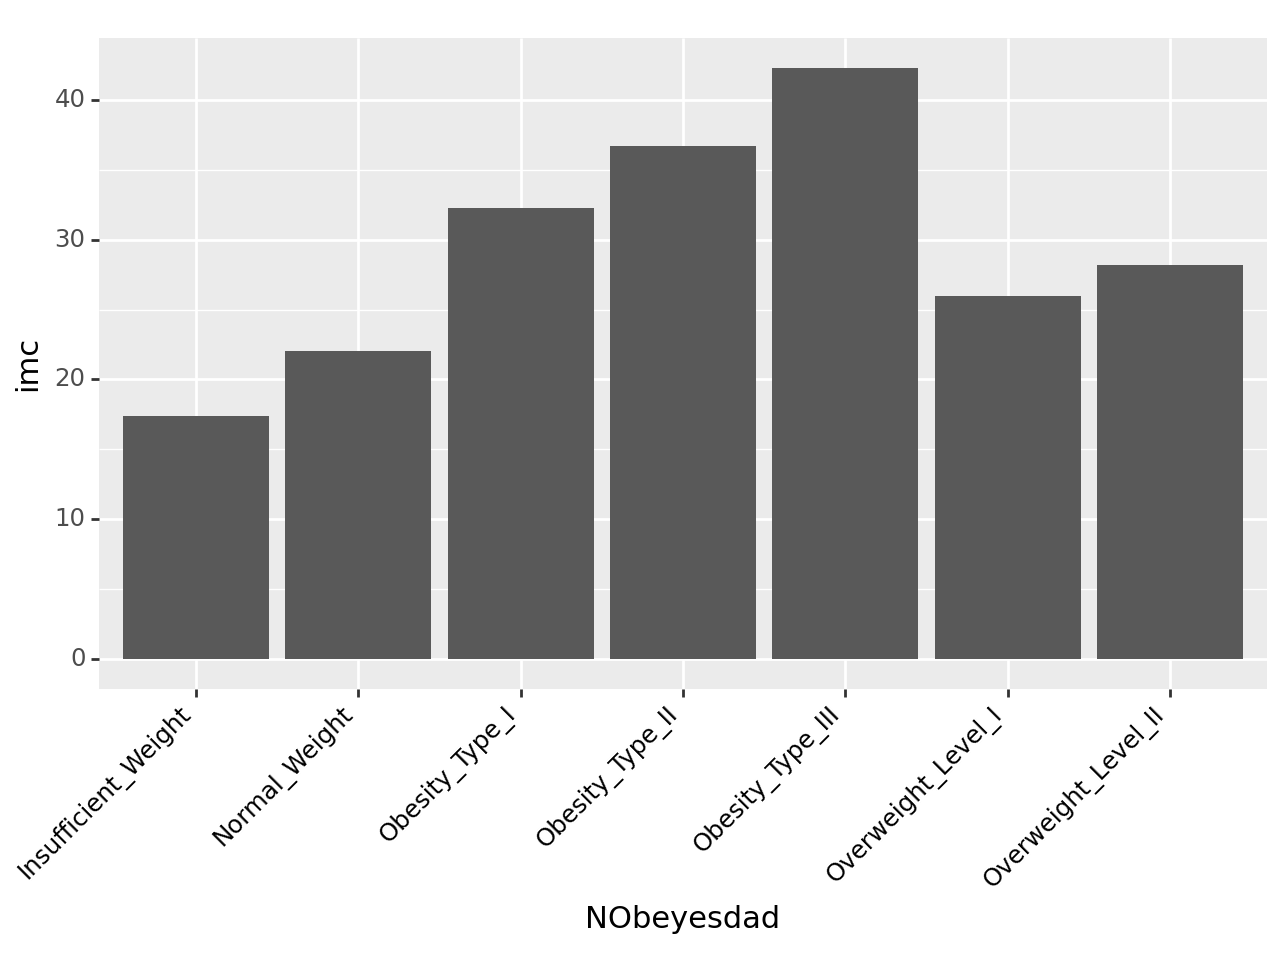

<Figure Size: (640 x 480)>

In [45]:
(
ggplot(grouped, aes(x='NObeyesdad',y='imc'))+
    geom_bar(stat="identity")+
    theme(axis_text_x = element_text(angle = 45, hjust = 1,color = "black"))


)